# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

tab = pd.read_csv("/content/drive/MyDrive/Study analise de dados/Data Viking/unicorns till sep 2022.csv")
tab.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
tab.rename( columns= {
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor em bilhões',
    'Date Joined' : 'Data de adesão',
    'Country' : 'País',
    'City' : 'Cidade',
    'Industry' : 'Ramo',
    'Investors': 'Investidores',
}, inplace = True    
)

In [ ]:
tab.shape

(1186, 7)

In [ ]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Empresa           1186 non-null   object        
 1   Valor em bilhões  1186 non-null   object        
 2   Data de adesão    1186 non-null   datetime64[ns]
 3   País              1186 non-null   object        
 4   City              1186 non-null   object        
 5   Ramo              1186 non-null   object        
 6   Investidores      1168 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 65.0+ KB


In [ ]:
tab.isnull().sum()

Empresa              0
Valor em bilhões     0
Data de adesão       0
País                 0
City                 0
Ramo                 0
Investidores        18
dtype: int64

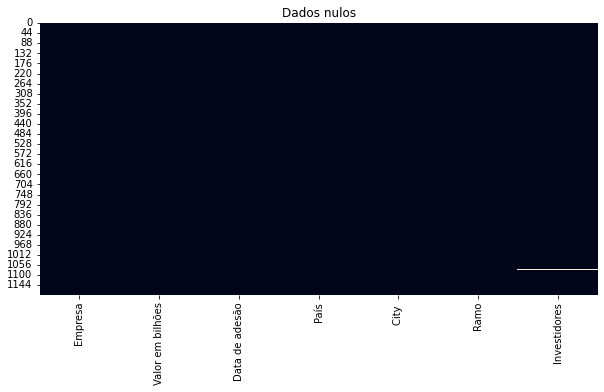

In [ ]:
# grafico de nulos
plt.figure(figsize=(10, 5))
plt.title('Dados nulos')
sns.heatmap(tab.isnull(), cbar=False);
# a barra mostra onde possuo campos nulos

In [ ]:
tab.nunique()

Empresa             1183
Valor em bilhões     222
Data de adesão       695
País                  48
City                 286
Ramo                  34
Investidores        1152
dtype: int64

In [ ]:
# valores unicos de determinada coluna
tab['Ramo'].nunique()
# listar esses valores
tab['Ramo'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [ ]:
# conta quantas vezes cada valor aparece
tab['Ramo'].value_counts()

Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail                     

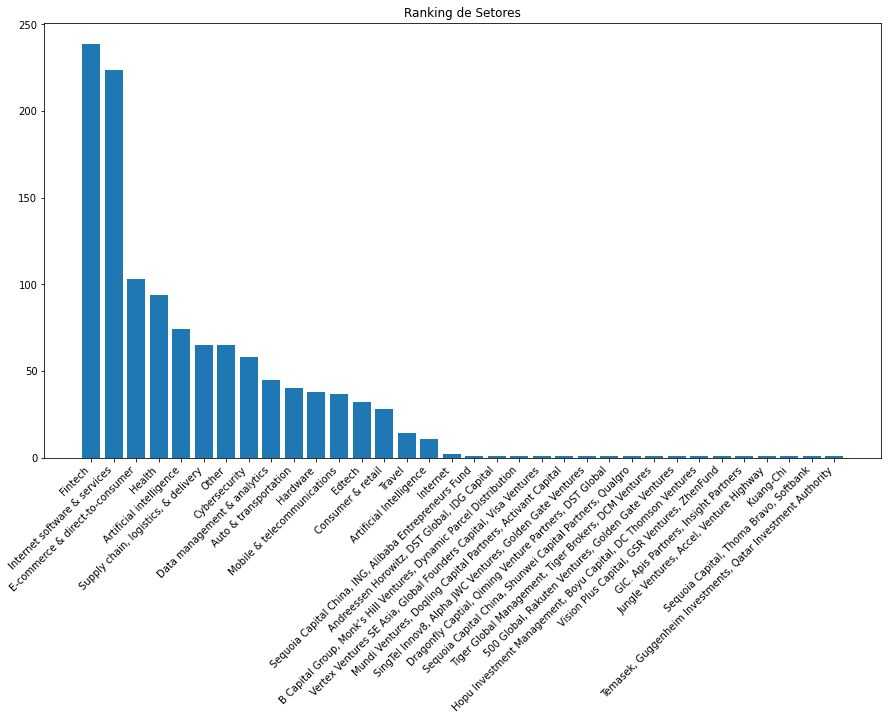

In [ ]:
plt.figure(figsize = (15, 8))
plt.title("Ranking de Setores")
plt.bar(tab['Ramo'].value_counts().index, tab['Ramo'].value_counts())
plt.xticks(rotation=45, ha='right' );

In [ ]:
tab['País'].value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia             

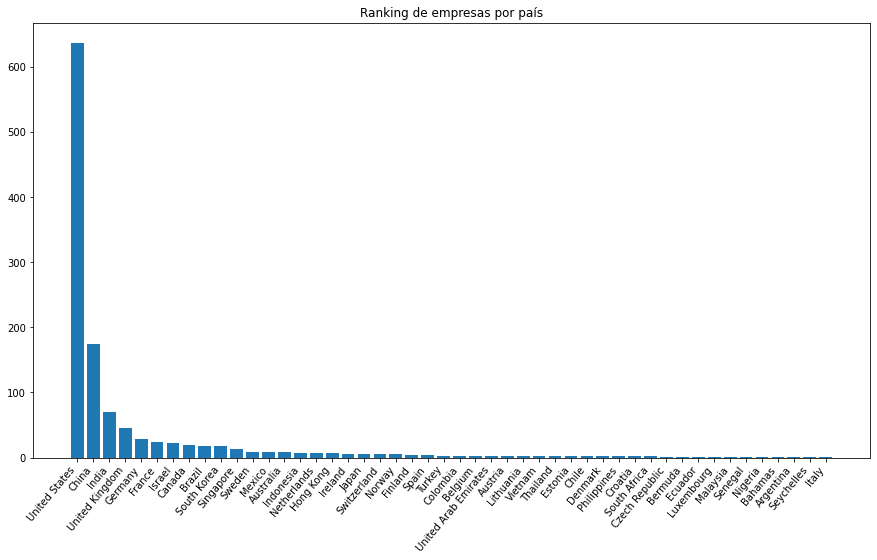

In [ ]:
plt.figure(figsize = (15, 8))
plt.title('Ranking de empresas por país')
plt.bar(tab['País'].value_counts().index, tab['País'].value_counts())
plt.xticks(rotation = 50, ha ='right');

In [ ]:
# porcentagem por país
porce = round(tab['País'].value_counts(normalize = True) * 100, 1)
porce.head()

United States     53.6
China             14.7
India              5.9
United Kingdom     3.9
Germany            2.4
Name: País, dtype: float64

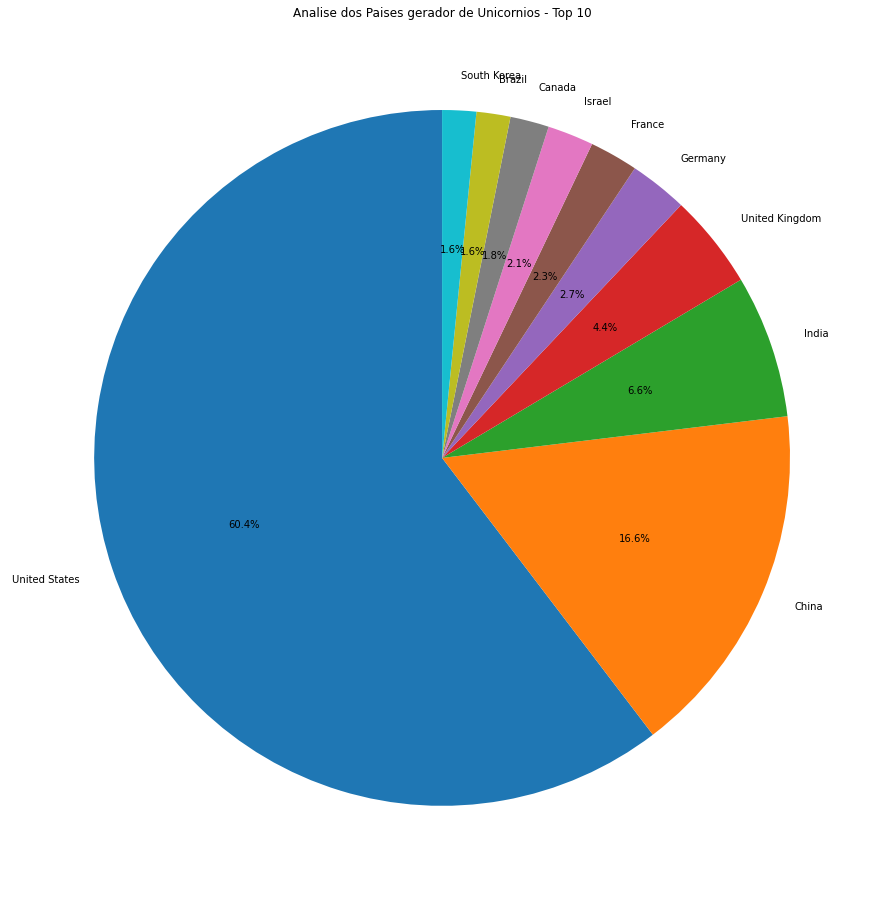

In [ ]:
# plot da porcentagem dos paises
plt.figure( figsize=(25,16) )
plt.title('Analise dos Paises gerador de Unicornios - Top 10')
plt.pie(
    porce.head(10),
    labels = porce.index[0:10], #seleciona os 10 primeiros
    shadow=False,
    startangle=90,
    autopct='%1.1f%%'
);

In [ ]:
#conversão de data
tab['Data de adesão'] = pd.to_datetime(tab['Data de adesão'])
tab['Data de adesão']

0      2017-04-07
1      2012-12-01
2      2018-07-03
3      2014-01-23
4      2018-01-08
          ...    
1181   2022-06-21
1182   2022-06-21
1183   2022-07-05
1184   2022-07-12
1185   2022-07-27
Name: Data de adesão, Length: 1186, dtype: datetime64[ns]

In [ ]:
# convertendo a coluna valor
tab['Valor em bilhões'] = pd.to_numeric( tab['Valor em bilhões'].apply( lambda Linha: Linha.replace('$', '') ) )


In [ ]:
# agrupar por país, somar os valores 
va = tab.groupby( by=['País'] ).sum()['Valor em bilhões'].reset_index()
va.head()

,País,Valor em bilhões
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [ ]:
# e ordenar conforme aumenta
vaT = va.sort_values('Valor em bilhões', ascending = False)
vaT.head()

,País,Valor em bilhões
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


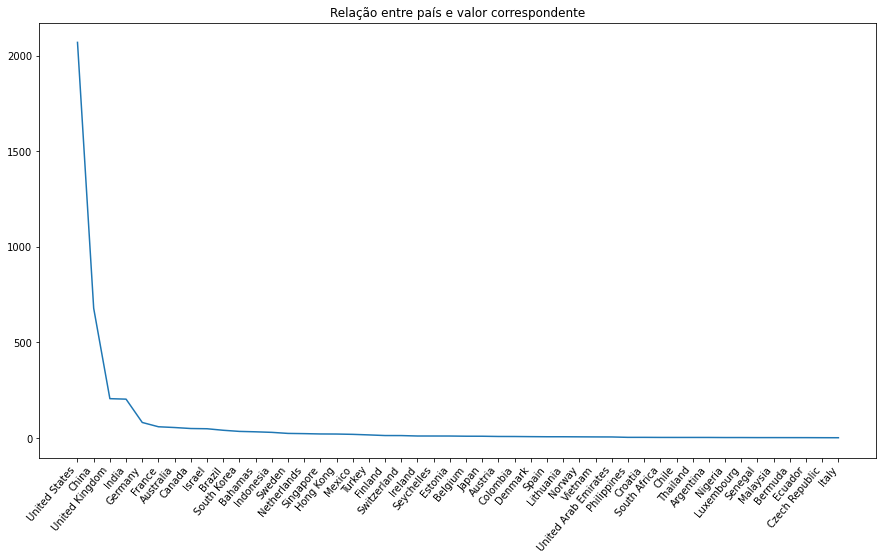

In [ ]:
# gerando grafico
plt.figure(figsize = (15,8))
plt.plot(vaT['País'], vaT['Valor em bilhões'])
plt.title('Relação entre país e valor correspondente')
plt.xticks(rotation = 50, ha='right');